In [33]:
import numpy as np
import pandas as pd


In [34]:
import glob
import matplotlib.pyplot as plt


In [35]:
gen_sign=[glob.glob('Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset4/real1/*.*'),
          ]
forg_sign=[glob.glob('Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
          glob.glob('Dataset_Signature_Final/Dataset/dataset4/forge/*.*'),
          ]


In [36]:
import cv2

In [37]:
def load_images(file_list):
    images =[]
    for files in file_list:
        for file in files:
            img=cv2.imread(file)
            images.append(img)
    return images

In [38]:
gen_imgs=load_images(gen_sign)
forg_imgs=load_images(forg_sign)

In [39]:
print(gen_imgs[0])

[[[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 251 239]
  [253 251 241]
  [253 252 242]]

 [[252 252 244]
  [252 252 244]
  [252 252 244]
  ...
  [253 252 241]
  [253 251 240]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [252 252 244]
  ...
  [253 251 240]
  [253 251 239]
  [253 251 240]]

 ...

 [[252 252 243]
  [253 252 242]
  [253 252 241]
  ...
  [253 252 242]
  [253 252 242]
  [253 252 242]]

 [[252 252 243]
  [252 252 243]
  [253 252 242]
  ...
  [253 252 241]
  [252 252 242]
  [252 252 243]]

 [[253 252 242]
  [252 252 242]
  [253 252 243]
  ...
  [253 251 240]
  [253 251 239]
  [253 252 241]]]


In [40]:
gen_imgs[0].shape

(88, 191, 3)

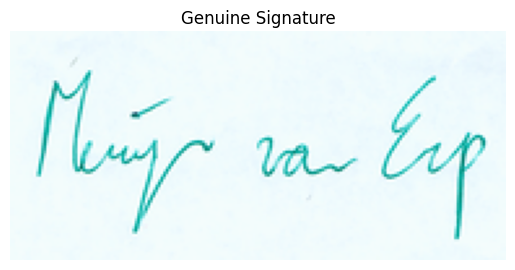

In [41]:
import cv2
import matplotlib.pyplot as plt

# Assuming gen_imgs is a list of images, and you want to show the first one
img = gen_imgs[0]  # Replace this with the actual image loading if needed

# Convert BGR to RGB (OpenCV uses BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use Matplotlib to display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.title('Genuine Signature')
plt.show()


In [42]:
num_gen= sum([len(x) for x in gen_sign])
num_forg =sum([len(x) for x in forg_sign])
print(f'Number of real signatures :{num_gen}')
print(f'Number of forged signatures:{num_forg}')


Number of real signatures :360
Number of forged signatures:360


In [45]:
#calculate dimensions of images,their color channels
gen_shape =[x.shape for x in gen_imgs]
forg_shape =[x.shape for x in forg_imgs]
print('shape of real images: ',gen_shape[:5])
print('shape of forged images: ',forg_shape[:5])

gen_color=[x.shape[2] for x in gen_imgs]
forg_color=[x.shape[2] for x in forg_imgs]
print('color channels of real images: ',gen_color[:5])
print('color channels of forged images: ',forg_color[:5])

gen_pixels=[x.mean() for x in gen_imgs]
forg_pixels=[x.mean() for x in forg_imgs]
print('mean pixels values of real images :',gen_pixels[:5])
print('mean pixels values of forged images :',forg_pixels[:5])




shape of real images:  [(88, 191, 3), (90, 184, 3), (80, 202, 3), (90, 186, 3), (90, 194, 3)]
shape of forged images:  [(83, 226, 3), (118, 223, 3), (91, 272, 3), (76, 161, 3), (83, 166, 3)]
color channels of real images:  [3, 3, 3, 3, 3]
color channels of forged images:  [3, 3, 3, 3, 3]
mean pixels values of real images : [np.float64(242.76453672854197), np.float64(243.156038647343), np.float64(243.3089315181518), np.float64(243.03986459577857), np.float64(242.72010309278352)]
mean pixels values of forged images : [np.float64(242.45354870810675), np.float64(243.70669605533178), np.float64(243.68103587588882), np.float64(239.77849515092078), np.float64(243.47038757439395)]


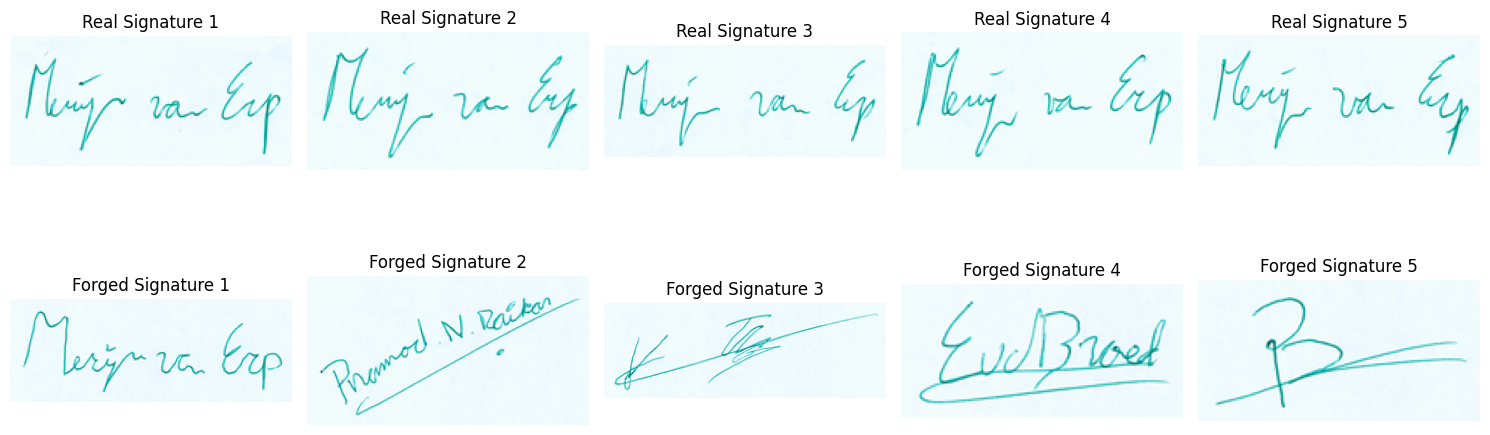

In [47]:
import matplotlib.pyplot as plt
import cv2

# Assuming gen_imgs and forg_imgs are lists containing images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))

# Plot genuine signatures in the first row
for i in range(5):
    ax[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    ax[0, i].set_title('Real Signature ' + str(i + 1))
    ax[0, i].axis('off')  # Hide the axis

# Plot forged signatures in the second row
for i in range(5):
    ax[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    ax[1, i].set_title('Forged Signature ' + str(i + 1))
    ax[1, i].axis('off')  # Hide the axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
